In [23]:
import pandas as pd
# 데이터 예시
data = {
'CustomerID': [1, 2, 3, 4, 5],
'Age': [25, 30, None, 35, 28],
'Gender': ['Male', 'Female', 'Female', 'Male', None],
'Satisfaction': [5, 4, 3, None, 2],
'PurchaseAmount': [100, 200, None, 150, 0]
}
df = pd.DataFrame(data)
# 결측치 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['PurchaseAmount'].fillna(0, inplace=True)
print(df)

   CustomerID   Age  Gender  Satisfaction  PurchaseAmount
0           1  25.0    Male           5.0           100.0
1           2  30.0  Female           4.0           200.0
2           3  29.5  Female           3.0             0.0
3           4  35.0    Male           NaN           150.0
4           5  28.0    None           2.0             0.0


C:\Users\wd\AppData\Local\Temp\ipykernel_11876\2276094841.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\wd\AppData\Local\Temp\ipykernel_11876\2276094841.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [24]:
# Gender는 숫자로 변환 (Label Encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# 특성과 타겟 분리
X = df[['Age', 'Gender', 'PurchaseAmount']] # 입력 데이터
y = df['Satisfaction'] # 출력 데이터
print(X)
print(y)


    Age  Gender  PurchaseAmount
0  25.0     0.0           100.0
1  30.0     1.0           200.0
2  29.5     1.0             0.0
3  35.0     0.0           150.0
4  28.0     NaN             0.0
0    5.0
1    4.0
2    3.0
3    NaN
4    2.0
Name: Satisfaction, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [27]:
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)
print(X_train) # 학습 데이터의 입력 데이터
print('*'*10)
print(y_train) # 학습 데이터의 출력 데이터
print('*'*10)
print(X_test) # 테스트 데이터의 입력 데이터
print('*'*10)
print(y_test) # 테스트 데이터의 출력 데이터


학습 데이터 크기: (4, 3)
테스트 데이터 크기: (1, 3)
    Age  Gender  PurchaseAmount
4  28.0     NaN             0.0
2  29.5     1.0             0.0
0  25.0     0.0           100.0
3  35.0     0.0           150.0
**********
4    2.0
2    3.0
0    5.0
3    NaN
Name: Satisfaction, dtype: float64
**********
    Age  Gender  PurchaseAmount
1  30.0     1.0           200.0
**********
1    4.0
Name: Satisfaction, dtype: float64


In [28]:
import numpy as np
import matplotlib.pyplot as plt
# 입력 데이터 (공부 시간)
X = np.array([1, 2, 3, 4, 5])
# 출력 데이터 (시험 점수)
y = np.array([50, 55, 65, 70, 75])

In [ ]:
# 2. 초기 값 설정
m = 0 # 초기 기울기
b = 0 # 초기 y절편
learning_rate = 0.01 # 학습 속도
epochs = 1000 # 학습 반복 횟수

# 경사하강법을 이용한 학습
for _ in range(epochs):
    # 예측 값 계산
    y_pred = m*X+b
    # 손실 함수(MSE) 계산
    error = y - y_pred
    mse = (error ** 2).mean()
    # 기울기(m)와 y절편(b)의 변화량 계산
    m_gradient = -(2 / len(X)) * sum(X * error)
    b_gradient = -(2 / len(X)) * sum(error)
    # 기울기와 절편 업데이트
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

학습된 기울기(m): 6.50
학습된 y절편(b): 43.50
MSE: 1.50
RMSE: 1.22
MAE: 1.00
R^2: 0.98


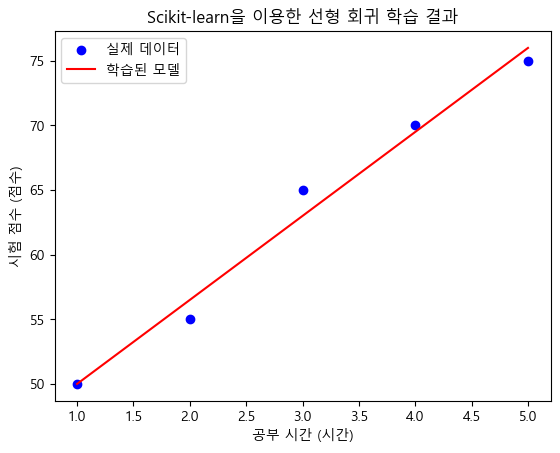

새로운 공부 시간에 따른 예측 점수: [63.  82.5]


In [40]:
import numpy as np 
# 수학적 계산을 위한 핵심 라이브러리인 NumPy를 'np'라는 별칭으로 임포트
import matplotlib.pyplot as plt
# 데이터 시각화를 위한 라이브러리인 Matplotlib의 pyplot 모듈을 'plt'라는 별칭으로 임포트
from sklearn.linear_model import LinearRegression
# Scikit-learn 라이브러리의 linear_model 모듈에서 선형 회귀(Linear Regression) 모델을 임포트
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
# Scikit-learn 라이브러리의 metrics 모듈에서 모델 성능 평가 지표인 MSE, MAE, R-squared를 임포트


# 1. 데이터 준비
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
# 학습데이터: '공부 시간' 데이터를 NumPy 배열로 생성하고, .reshape(-1, 1)을 사용하여 2차원 배열로 변환
# -1은 원본 배열의 길이를 자동으로 계산, 1은 열의 개수를 1개로 지정
# Scikit-learn 모델의 입력은 보통 2차원 배열 형태
y = np.array([50, 55, 65, 70, 75]) 
# 라벨(결과): '시험 점수' 데이터를 NumPy 배열로 생성
# 이는 예측하고자 하는 목표 변수(종속 변수)


# 2. 모델 학습
model = LinearRegression()
# 선형 회귀 모델 객체를 생성 
# 이 객체가 실제 학습을 수행
model.fit(X, y)
# 생성된 LinearRegression 모델 객체에 준비된 데이터 X(독립 변수)와 y(종속 변수)를 사용하여 모델을 학습
# 이 과정에서 최적의 기울기와 절편을 탐색


# 3. 학습된 모델의 지표: 기울기와 절편 확인
m = model.coef_[0]
# 학습된 선형 회귀 모델의 기울기(coefficient)
# model.coef_는 배열 형태로 반환되므로 첫 번째 값([0])
b = model.intercept_
# 학습된 선형 회귀 모델의 y절편(intercept)
print(f"학습된 기울기(m): {m:.2f}")
# f-string을 사용하여 학습된 기울기 m을 소수점 둘째 자리까지 출력
print(f"학습된 y절편(b): {b:.2f}")
# f-string을 사용하여 학습된 y절편 b를 소수점 둘째 자리까지 출력


# 4. 예측 값 계산
y_pred = model.predict(X)
# 학습된 모델(model)을 사용하여 학습 데이터 X에 대한 예측 값(y_pred)을 계산
# 이 값은 모델이 학습한 직선 위의 점들


# 5. 성능 평가
mse = mean_squared_error(y, y_pred)
# 실제 값(y)과 예측 값(y_pred) 사이의 평균 제곱근 오차(Mean Squared Error)를 계산
# 오차의 제곱의 평균으로, 큰 오차에 더 큰 가중치
rmse = np.sqrt(mse)
# MSE 값에 제곱근을 취하여 평균 제곱근 오차(Root Mean Squared Error)를 계산
# 이는 MSE와 달리 원래 데이터의 단위와 동일하여 해석하기 용이
mae = mean_absolute_error(y, y_pred)
# 실제 값(y)과 예측 값(y_pred) 사이의 평균 절대 오차(Mean Absolute Error)를 계산
r2 = r2_score(y, y_pred)
# 결정 계수(R-squared)를 계산. 모델이 종속 변수(y)의 분산을 얼마나 잘 설명하는지를 나타내며, 1에 가까울수록 모델의 설명력이 높다.
print(f"MSE: {mse:.2f}")
# 계산된 MSE를 소수점 둘째 자리까지 출력
print(f"RMSE: {rmse:.2f}")
# 계산된 RMSE를 소수점 둘째 자리까지 출력
print(f"MAE: {mae:.2f}")
# 계산된 MAE를 소수점 둘째 자리까지 출력
print(f"R^2: {r2:.2f}")
# 계산된 R-squared 값을 소수점 둘째 자리까지 출력


# 6. 학습 결과 시각화
plt.rc('font', family='Malgun Gothic')
# Matplotlib에서 한글 폰트가 깨지는 것을 방지하기 위해 'Malgun Gothic' 폰트를 설정 (Windows 운영체제 기준)
plt.scatter(X, y, color='blue', label='실제 데이터')
# 실제 데이터 포인트(X, y)를 파란색 점(scatter)으로 그래프에 추가하고 '실제 데이터'로 라벨을 지정
plt.plot(X, y_pred, color='red', label='학습된 모델')
# 학습된 모델의 예측 값(X, y_pred)을 빨간색 선(plot)으로 그래프에 추가하고 '학습된 모델'로 라벨을 지정 (회귀선)
plt.xlabel('공부 시간 (시간)')
plt.ylabel('시험 점수 (점수)')
plt.legend()
# 범례(label)를 그래프에 표시
plt.title('Scikit-learn을 이용한 선형 회귀 학습 결과')
plt.show()


# 7. 새로운 데이터 예측
new_study_hours = np.array([3,6]).reshape(-1, 1)
# 모델에 예측을 요청할 새로운 '공부 시간' 데이터를 NumPy 배열로 생성하고 2차원 배열로 변환
predicted_scores = model.predict(new_study_hours)
# 학습된 모델(model)을 사용하여 새로운 공부 시간(new_study_hours)에 대한 시험 점수를 예측
print("새로운 공부 시간에 따른 예측 점수:", predicted_scores)
# 예측된 점수들을 출력